In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
data=np.load('./Data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [3]:
X=data['arr_0']
y=data['arr_1']
mean=data['arr_2']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4368, 50), (1093, 50), (4368,), (1093,))

# Training MACHINE LEARNING MODEL

In [5]:
from sklearn.svm import SVC


In [6]:
model=SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)


In [7]:
model.fit(x_train,y_train)
print("Model trained successfully")

Model trained successfully


In [8]:
model.score(x_train,y_train)

0.8612637362637363

In [9]:
model.score(x_test,y_test)

0.8225068618481244

# Model Evaluation
- Confusion Matrix
- Classification Report
- Kappa Score
- ROC & AUC (Probability)

In [10]:
from sklearn import metrics

In [11]:
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

In [12]:
#Confusion Matrix
cm=metrics.confusion_matrix(y_test,y_pred)
cm=np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm=np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
cm

array([[ 328,  114,  442],
       [  80,  571,  651],
       [ 408,  685, 1093]], dtype=int64)

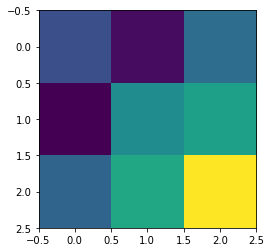

In [13]:
plt.imshow(cm)

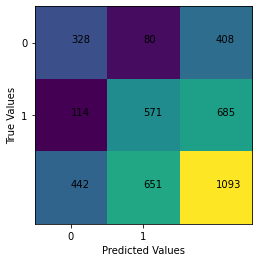

In [14]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i][j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [15]:
#classification report
cr=metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.803922,0.742081,0.771765,442.000000
female,0.833577,0.877112,0.854790,651.000000
accuracy,0.822507,0.822507,0.822507,0.822507
macro avg,0.818749,0.809597,0.813278,1093.000000
weighted avg,0.821584,0.822507,0.821216,1093.000000


In [16]:
#kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.6269348919205177

# ROC & AUC


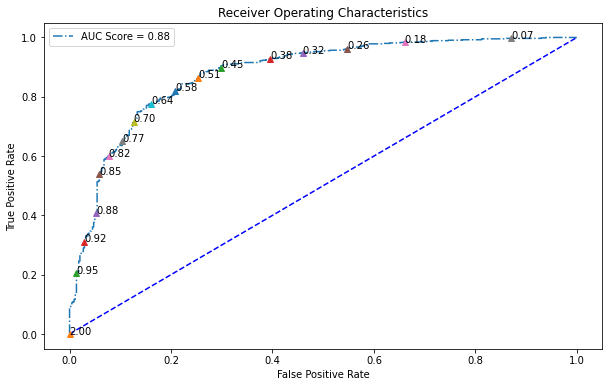

In [17]:
#roc for female
fpr,tpr,thresh=metrics.roc_curve(y_test,y_prob[:,1])
auc_s=metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

# Hyper Parameter Tuning

In [18]:
model_tune=SVC()


In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid={'C':[1,10,20,30,50,100],
           'kernel':['rbf','poly'],
           'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
           'coef0':[0,1],
           }

In [21]:
model_grid=GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=1)

In [22]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [23]:
model_grid.best_index_

104

In [24]:
model_grid.best_params_

{'C': 50, 'coef0': 0, 'gamma': 0.002, 'kernel': 'rbf'}

In [25]:
model_grid.best_score_

0.783739346959841

In [26]:
#With best parameters,build ML Model
model_best=SVC(C=30,kernel='rbf',gamma=0.002,probability=True)

In [27]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)


0.817932296431839

In [28]:
y_pred=model_best.predict(x_test)
y_prob=model_best.predict_proba(x_test)

In [29]:
#Confusion Matrix
cm=metrics.confusion_matrix(y_test,y_pred)
cm=np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm=np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
cm

array([[ 325,  117,  442],
       [  82,  569,  651],
       [ 407,  686, 1093]], dtype=int64)

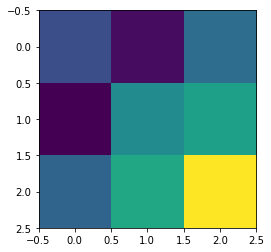

In [30]:
plt.imshow(cm)

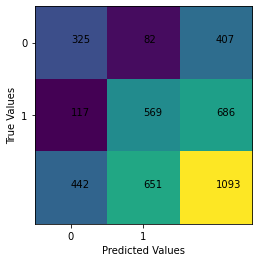

In [31]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i][j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [32]:
#classification report
cr=metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.798526,0.735294,0.765607,442.000000
female,0.829446,0.874040,0.851159,651.000000
accuracy,0.817932,0.817932,0.817932,0.817932
macro avg,0.813986,0.804667,0.808383,1093.000000
weighted avg,0.816942,0.817932,0.816563,1093.000000


In [33]:
#kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.6171790435592227

# ROC & AUC


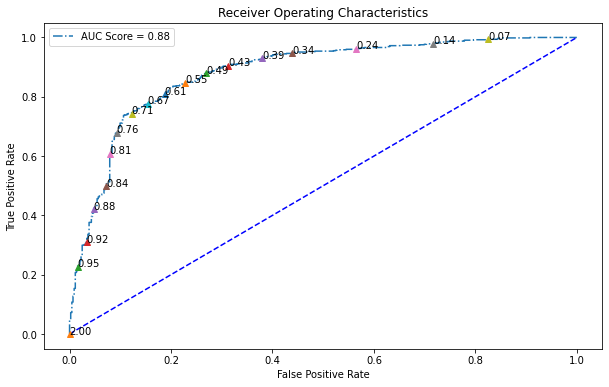

In [34]:
#roc for female
fpr,tpr,thresh=metrics.roc_curve(y_test,y_prob[:,1])
auc_s=metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

In [35]:
#save our ML Model
import pickle

In [36]:
pickle.dump(model_best,open('./Model/model_svm.pickle','wb'))

In [37]:
pickle.dump(mean,open('./Model/mean_preprocess.pickle','wb'))
